<a href="https://colab.research.google.com/github/ehcacao/Pynthon/blob/master/aula01_allura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()


,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
?filmes

In [0]:
?filmes.head

In [223]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [224]:
avaliacoes.shape

(100836, 4)

In [225]:
len(avaliacoes)

100836

In [226]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [227]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [228]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [229]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [230]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [231]:
avaliacoes["nota"] #Notas

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [232]:
avaliacoes["nota"].mean() #media de notas

3.501556983616962

In [233]:
avaliacoes_do_filme_1["nota"].mean() #media da nota apenas do filme1

3.9209302325581397

In [234]:
notas_media_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() #agrupando pelo Id as medias
notas_media_por_filme.head() #Impressao das 5 primeiras linhas

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [235]:
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [236]:
notas_media_por_filme


filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [237]:
filmes_com_media = filmes.join(notas_media_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [238]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


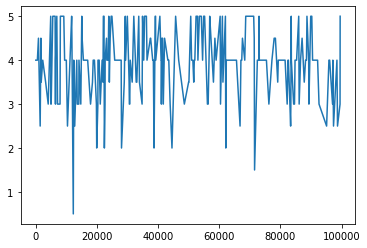

In [239]:
avaliacoes.query("filmeId == 1")["nota"].plot()

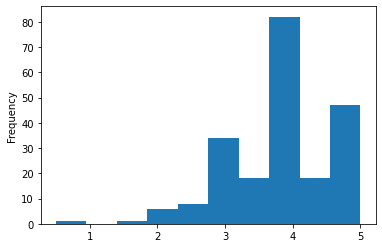

In [240]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

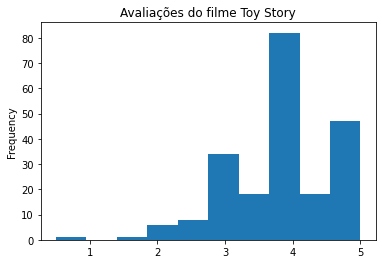

In [241]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

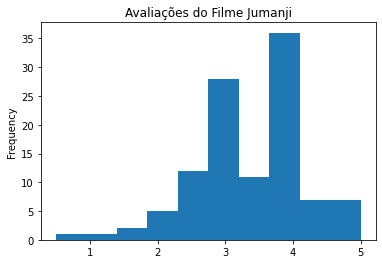

In [242]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist', title="Avaliações do Filme Jumanji")

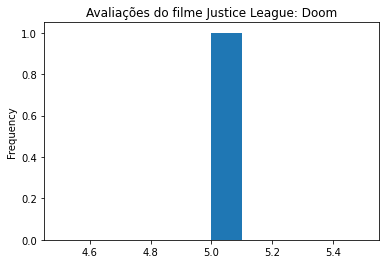

In [243]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist', title="Avaliações do filme Justice League: Doom")

## Desafio 1

In [244]:
print("Número total de filmes:", len(filmes))
print("Número total de filmes avaliados:", len(notas_media_por_filme))

Número total de filmes: 9742
Número total de filmes avaliados: 9724


In [245]:
filmes_avaliados = filmes_com_media.query("nota in @notas_media_por_filme")
filmes_nao_avaliados = filmes_com_media.query("nota not in @notas_media_por_filme")
#Precisa determinar quantos filmes não foram avaliados, verificando o tamanho desse DataFrame
print("Quantidade de filmes não Avaliados:", len(filmes_nao_avaliados))
filmes_nao_avaliados

Quantidade de filmes não Avaliados: 18


,filmeId,titulo,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2

In [246]:
filmes_com_media.columns = [coluna for coluna in filmes_com_media.columns[0:len(filmes.columns)]] + ["media"]
filmes_com_media.head()

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3

In [247]:
soma_de_avaliacoes_filme = avaliacoes.groupby("filmeId")["nota"].count()
#trocar o nome media por votos
soma_de_avaliacoes_filme.name = "Votos"
filmes_com_media = filmes_com_media.join(soma_de_avaliacoes_filme, on="filmeId")
#Mostrar as alterações
filmes_com_media.head()

,filmeId,titulo,genero,media,Votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4

In [248]:
filmes_com_media["media"] = [float("%.2f" %media) for media in filmes_com_media["media"]]
filmes_com_media.head()

,filmeId,titulo,genero,media,Votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5

In [249]:
generos_dos_filmes = []
filmes_com_media["genero"][0]
for genero in filmes_com_media["genero"]:
  lista_de_generos = genero.split("|")
  for generos in lista_de_generos:
    if not generos in generos_dos_filmes:
      generos_dos_filmes.append(generos)


generos_dos_filmes  

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

## Desafio 6

In [254]:
aparicoes_de_cada_genero = dict([[generos, 0] for generos in generos_dos_filmes])
for genero in filmes_com_media["genero"]:
  lista_de_generos = genero.split("|")
  for generos in lista_de_generos:
    aparicoes_de_cada_genero[generos] +=1

print("Número de aparições de cada genero")
aparicoes_de_cada_genero  

Número de aparições de cada genero


{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

## Desafio 7

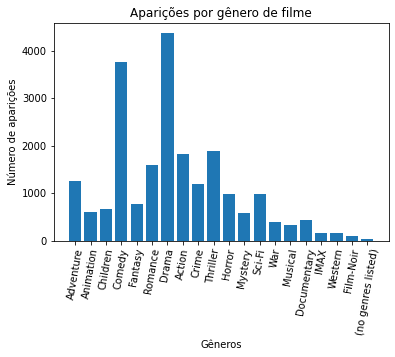

In [259]:
import matplotlib.pyplot as plt

#Nomes dos eixos
plt.xlabel("Gêneros")
plt.ylabel("Número de aparições")

#Título
plt.title("Aparições por gênero de filme")

plt.xticks(range(0, len(aparicoes_de_cada_genero.keys())), aparicoes_de_cada_genero.keys(), rotation=80)

plt.bar(aparicoes_de_cada_genero.keys(), aparicoes_de_cada_genero.values())
plt.show()